# Zadanie 2
Klasyfikacja binarna na podstawie danych Breast Cancer:
• Zadanie polega na zbudowaniu prostego modelu głębokiej sieci neuronowej w Keras do
klasyfikacji białaczkowych komórek nowotworowych na podstawie danych z Breast Cancer Dataset
• Wykorzystaj bazę danych Breast Cancer, która zawiera informacje diagnostyczne dotyczące raka piersi.
• Zdefiniuj prostą architekturę modelu, skompiluj go i przeprowadź proces trenowania.
• Wykorzystaj metody oceny na zbiorze testowym, takie jak dokładność, precyzja, czułość,
specyficzność, oraz zwizualizuj wyniki za pomocą macierzy pomyłek.

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sea

from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [13]:
# Wczytanie danych
data = load_breast_cancer()
X = data.data
y = data.target
# Podział danych na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train

array([[9.029e+00, 1.733e+01, 5.879e+01, ..., 1.750e-01, 4.228e-01,
        1.175e-01],
       [2.109e+01, 2.657e+01, 1.427e+02, ..., 2.903e-01, 4.098e-01,
        1.284e-01],
       [9.173e+00, 1.386e+01, 5.920e+01, ..., 5.087e-02, 3.282e-01,
        8.490e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]])

In [14]:
# Definicja modelu CNN
model = Sequential([
 Dense(29, activation='relu'),
 Dense(16, activation='relu'),
 Dense(8, activation='relu'),
 Dense(4, activation='relu'),
 Dense(2, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [15]:
# Trenowanie modelu
history = model.fit(x_train, y_train, epochs=6, validation_data=(x_test, y_test))

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Dokładność klasyfikacji:', test_acc)

Epoch 1/6
15/15 [==============================] - 2s 26ms/step - loss: 29.5823 - accuracy: 0.5582 - val_loss: 5.7590 - val_accuracy: 0.4386
Epoch 2/6
15/15 [==============================] - 0s 10ms/step - loss: 2.8571 - accuracy: 0.7758 - val_loss: 1.0949 - val_accuracy: 0.8158
Epoch 3/6
15/15 [==============================] - 0s 10ms/step - loss: 0.9802 - accuracy: 0.8637 - val_loss: 0.5893 - val_accuracy: 0.9298
Epoch 4/6
15/15 [==============================] - 0s 10ms/step - loss: 0.8339 - accuracy: 0.8835 - val_loss: 0.4850 - val_accuracy: 0.9298
Epoch 5/6
15/15 [==============================] - 0s 9ms/step - loss: 0.7052 - accuracy: 0.8879 - val_loss: 0.2550 - val_accuracy: 0.9386
Epoch 6/6
4/4 [==============================] - 0s 3ms/step - loss: 0.3657 - accuracy: 0.9298
Dokładność klasyfikacji: 0.9298245906829834


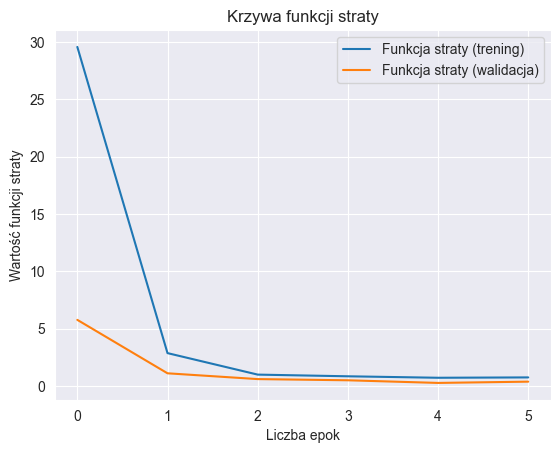

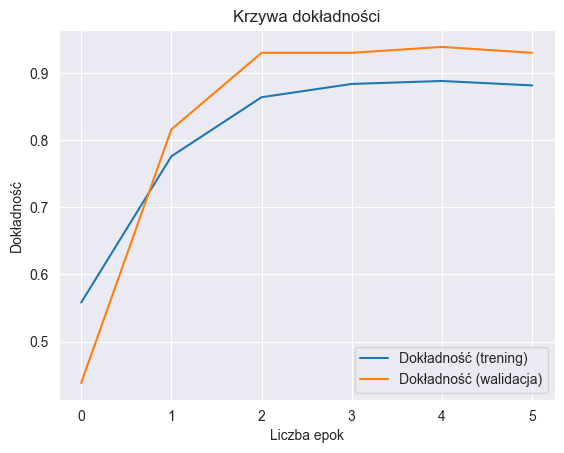

In [16]:
# Wizualizacja krzywych uczenia
plt.plot(history.history['loss'], label='Funkcja straty (trening)')
plt.plot(history.history['val_loss'], label='Funkcja straty (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Wartość funkcji straty')
plt.legend()
plt.title('Krzywa funkcji straty')
plt.show()
plt.plot(history.history['accuracy'], label='Dokładność (trening)')
plt.plot(history.history['val_accuracy'], label='Dokładność (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Krzywa dokładności')
plt.show()

# Wnioski do krzywej funkcji strat
Można zauważyć dla mojego modelu że jego efektywna nauka kończy się na epoce 1 co widać w charakterystycznym "zgięciu" się funkcji straty.

In [17]:
# Tworzenie Predykcji
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [18]:
# Wartości predykcji przed zmianą na binarne
y_pred

array([[1.60085410e-01, 8.39914560e-01],
       [1.00000000e+00, 3.37234746e-33],
       [1.00000000e+00, 1.12077292e-13],
       [1.03244822e-07, 9.99999881e-01],
       [9.07579988e-07, 9.99999046e-01],
       [1.00000000e+00, 2.73954675e-17],
       [1.00000000e+00, 9.97405193e-32],
       [9.99686360e-01, 3.13681696e-04],
       [3.43412466e-05, 9.99965668e-01],
       [8.23050679e-04, 9.99176919e-01],
       [2.59379758e-05, 9.99974012e-01],
       [1.00000000e+00, 2.33806113e-10],
       [3.44070635e-04, 9.99655962e-01],
       [1.88697921e-03, 9.98113036e-01],
       [5.77906321e-04, 9.99422073e-01],
       [3.12582143e-02, 9.68741775e-01],
       [2.14008702e-04, 9.99785960e-01],
       [6.69871767e-08, 9.99999881e-01],
       [9.46314831e-04, 9.99053657e-01],
       [1.00000000e+00, 2.47662318e-20],
       [9.73892093e-01, 2.61078514e-02],
       [4.49465988e-05, 9.99955058e-01],
       [1.00000000e+00, 7.81836354e-33],
       [7.18168735e-07, 9.99999285e-01],
       [2.028147

In [19]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

[36 70]


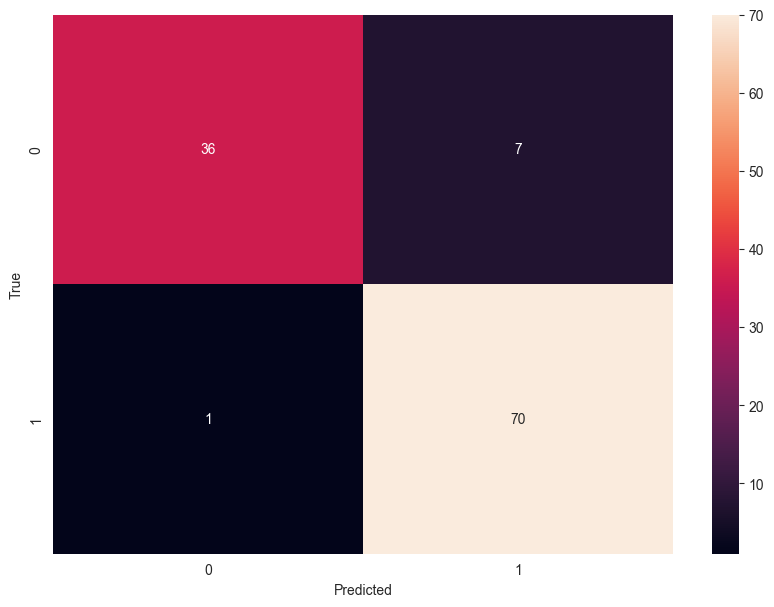

In [20]:
# Obliczenie confusion matrix

cm = confusion_matrix(y_test, y_pred)

print(cm.diagonal())

# Tworzenie DataFrame z confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in range(2)], columns = [i for i in range(2)])

# Tworzenie heatmapy confusion matrix
plt.figure(figsize = (10,7))
sea.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

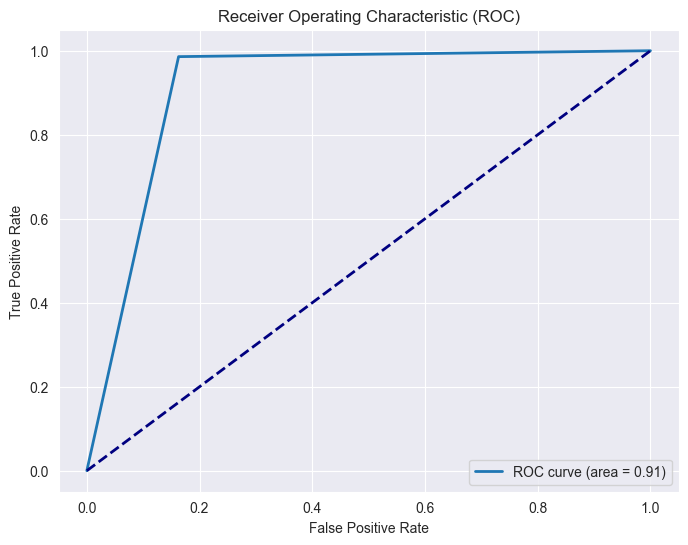

In [21]:
# Obliczenie krzywych ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Wyświetlenie krzywej ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [27]:
# Czułość modelu:
recall = recall_score(y_test, y_pred, average='micro')
print("Czułość modelu: {:.2f}%".format(recall * 100))

# Obliczenie precyzji
precision = precision_score(y_test, y_pred, average='micro')
print("Precyzja modelu: {:.2f}%".format(precision * 100))

# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność modelu:", accuracy)

Czułość modelu: 92.98%
Precyzja modelu: 92.98%
Dokładność modelu: 0.9298245614035088
